In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
from icecream import ic
import random

import torch

In [38]:
data = pd.read_csv("/home/sonn/Son/Workspace/IR_PhanLoaiNuocCam/IR/data/processed/data.csv")
data.head()

,TenMau,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,NA.23.xadoai.10,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,BG.23.vinh.02,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,NA.23.xadoai.03,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,TQ.23.vinh.01,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,VL.23.sanh.10,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [39]:
X = data.iloc[:, 1:]
tenmau = data["TenMau"]
ma = []
for mau in tenmau:
    ma.append(mau.replace("/", "")[0:2])
data["TenMau"] = ma

In [40]:
y = data["TenMau"]
le = LabelEncoder()
y = le.fit_transform(y)
data["TenMau"] = y

In [41]:
data.head()

,TenMau,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,4,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,0,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,4,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,9,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,11,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [42]:
X.head()

,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,682.1028,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,0.270213,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,0.307793,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,0.385570,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,0.225304,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,0.252468,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [43]:
Y = data["TenMau"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
# onehot = OneHotEncoder(sparse_output=False)
# y_train = onehot.fit_transform(y_train.values.reshape(-1,1))
# y_test = onehot.fit_transform(y_test.values.reshape(-1,1))

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

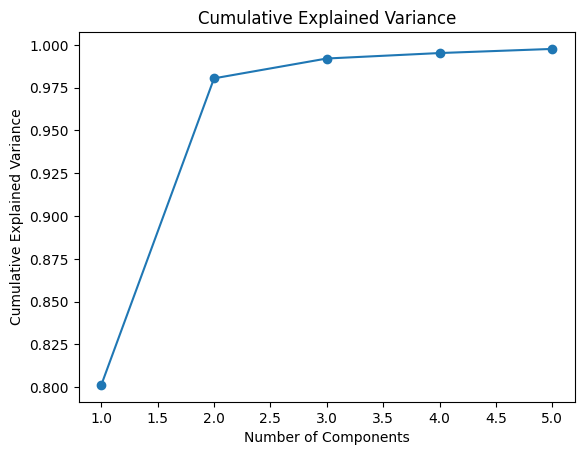

In [47]:
pca = PCA(5)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [48]:
pca = PCA(n_components=5)
PC_X_train = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(data=PC_X_train)
X_train_pca_ar = np.array(X_train_pca)

In [49]:
X_train_pca.to_csv("hi.csv")

In [50]:
PC_X_test = pca.fit_transform(X_test_scaled)
X_test_pca = pd.DataFrame(data=PC_X_test)
X_test_pca_ar = np.array(X_test_pca)

In [66]:
y_train[0]

4

In [53]:
train_input = torch.tensor(X_train_pca_ar, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_input = torch.tensor(X_test_pca_ar, dtype=torch.float32)
test_label = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [54]:
assert not torch.isnan(train_input).any(), "NaNs found in train_input"
assert not torch.isnan(train_label).any(), "NaNs found in train_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isinf(train_input).any(), "Infinities found in train_input"
assert not torch.isinf(train_label).any(), "Infinities found in train_label"
assert not torch.isinf(test_input).any(), "Infinities found in test_input"
assert not torch.isinf(test_label).any(), "Infinities found in test_label"

In [55]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [56]:
from kan import KAN, create_dataset

In [57]:
from kan import KAN, create_dataset

input_dim = train_input.shape[1]  # Number of input features
output_dim = 1  
model = KAN(width=[input_dim, 3, output_dim], grid=3, k=2, seed=0)  # Simplified model configuration

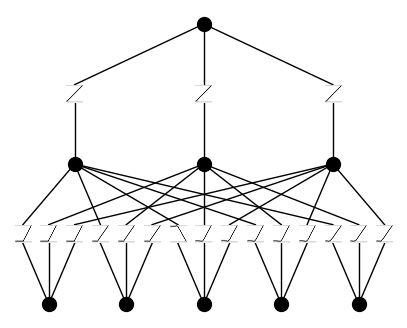

In [58]:
model(dataset['train_input'])
model.plot(beta=100)

train loss: 5.92e+00 | test loss: 9.31e+00 | reg: 4.80e+01 : 100%|██| 50/50 [00:00<00:00, 62.91it/s]


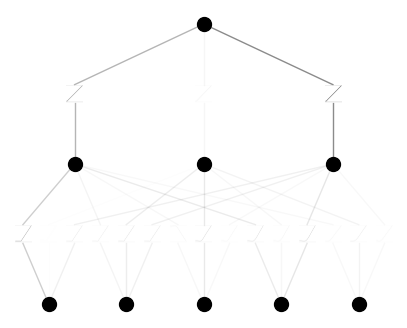

In [59]:
model.train(dataset, opt="Adam", steps=50, lr=0.001, lamb=0.01, lamb_entropy=10.)
model.plot()

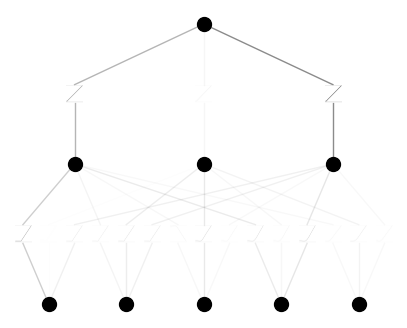

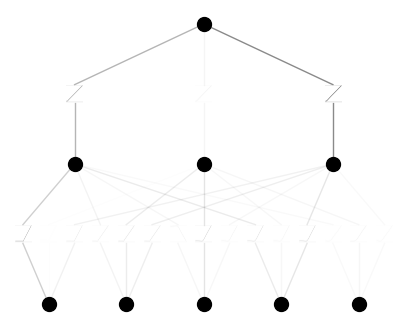

In [60]:
model.prune()
model.plot(mask=True)
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 4.82e+00 | test loss: 7.50e+00 | reg: 1.00e+01 : 100%|██| 50/50 [00:00<00:00, 51.98it/s]


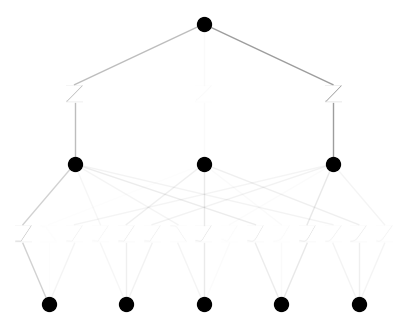

In [61]:
model.train(dataset, opt="Adam", steps=50, lr=0.001)
model.plot()

In [62]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with x^2, r2=0.9712659120559692
fixing (0,0,1) with x^2, r2=0.9804753065109253
fixing (0,0,2) with x^2, r2=0.9698411226272583
fixing (0,1,0) with x^2, r2=0.9580233097076416
fixing (0,1,1) with x^2, r2=0.959886372089386
fixing (0,1,2) with x^2, r2=0.9593762159347534
fixing (0,2,0) with sin, r2=0.9953702092170715
fixing (0,2,1) with sin, r2=0.9917665123939514
fixing (0,2,2) with sin, r2=0.987537682056427
fixing (0,3,0) with sin, r2=0.995881199836731
fixing (0,3,1) with tanh, r2=0.9992230534553528
fixing (0,3,2) with sin, r2=0.9957482218742371
fixing (0,4,0) with sin, r2=0.9996805191040039
fixing (0,4,1) with sin, r2=0.9996059536933899
fixing (0,4,2) with sin, r2=0.9996671676635742
fixing (1,0,0) with abs, r2=0.9997755885124207
fixing (1,1,0) with x^2, r2=0.9929695129394531
fixing (1,2,0) with abs, r2=0.9993820786476135


0.81*(0.01*(-0.02*x_1 - 1)**2 - 0.03*(-0.08*x_2 - 1)**2 - 0.08*sin(0.24*x_3 - 7.36) + 0.04*sin(0.3*x_5 + 2.03) - 0.01*tanh(0.34*x_4 - 1.0) - 1)**2 + 0.07*Abs(9.42*(0.03*x_1 + 1)**2 + 5.83*(0.08*x_2 + 1)**2 - 3.12*sin(0.27*x_3 - 4.34) + 15.35*sin(0.29*x_4 - 1.09) + 4.78*sin(0.33*x_5 - 7.4) + 16.39) + 0.04*Abs(48.86*(0.03*x_1 + 1)**2 + 4.35*(0.08*x_2 + 1)**2 + 9.05*sin(0.22*x_3 + 8.43) + 13.67*sin(0.3*x_4 - 1.08) + 5.54*sin(0.32*x_5 + 5.19) - 2.32) - 0.9